<a href="https://colab.research.google.com/github/adarshkumar-yadav/Home-energy-saver-machine-learning-project/blob/main/copy_of_home_energy_saver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv(r"/content/Sample_of_Synthetic_Home_Energy_Dataset.csv")


df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Feature selection
features = ['T1', 'RH_1', 'T2', 'RH_2', 'T_out', 'RH_out', 'Windspeed']
target = 'Appliances'

X = df[features]
y = df[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.head()

,T1,RH_1,T2,RH_2,T_out,RH_out,Windspeed,Appliances
date,,,,,,,,
2025-01-01 00:00:00,28.38,64.39,27.89,60.39,27.48,68.76,8.72,247.5
2025-01-01 01:00:00,24.16,61.93,26.73,57.79,24.31,64.25,0.29,175.3
2025-01-01 02:00:00,30.63,42.62,30.98,46.15,28.24,51.37,8.26,302.7
2025-01-01 03:00:00,37.11,84.42,34.59,80.52,32.62,89.19,1.29,410.6
2025-01-01 04:00:00,25.82,61.03,24.91,58.11,23.83,66.35,3.35,202.9


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, predictions))
print("R2 Score:", r2_score(y_test, predictions))

MSE: 284.69489099999515
R2 Score: 0.8279507338563714


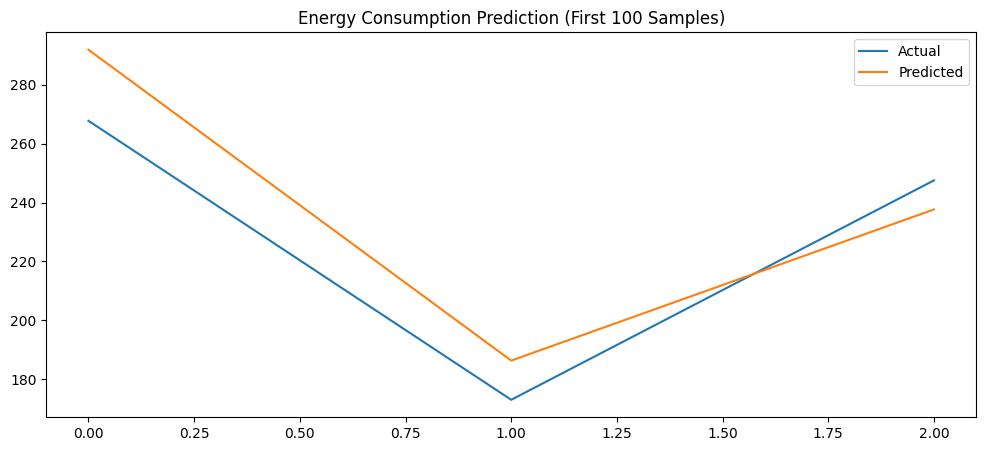

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test[:100].values, label='Actual')
plt.plot(predictions[:100], label='Predicted')
plt.legend()
plt.title("Energy Consumption Prediction (First 100 Samples)")
plt.show()

In [ ]:
def recommend_action(temp_out, ac_status, light_power):
    rec = []
    if temp_out < 20 and ac_status == 1:
        rec.append("Switch off AC: Outside temperature is low.")
    if light_power > 300:
        rec.append("Turn off unnecessary lights.")
    if not rec:
        rec.append("Energy usage is optimal.")
    return rec

# Example:
recommend_action(18, 1, 350)

['Switch off AC: Outside temperature is low.', 'Turn off unnecessary lights.']

In [ ]:
!pip install streamlit

In [ ]:
# streamlit_app.py
import streamlit as st

# Dummy recommendation function (you should replace this with your own logic)
def recommend_action(temp, ac_status, lights):
    recommendations = []
    if temp > 30 and not ac_status:
        recommendations.append("Turn on the AC.")
    if lights > 500:
        recommendations.append("Reduce light usage to save energy.")
    if temp < 15:
        recommendations.append("Consider heating.")
    if not recommendations:
        recommendations.append("All settings seem optimal.")
    return recommendations

# Streamlit App UI
st.title("Sample of Synthetic Home Energy Dataset")

temp = st.slider("Outside Temperature (°C)", 0, 40, 25)
humidity = st.slider("Humidity (%)", 10, 100, 45)
ac = st.selectbox("AC Status", ["Off", "On"])
lights = st.slider("Light Power (W)", 0, 1000, 200)

# Recommendation logic
rec = recommend_action(temp, 1 if ac == "On" else 0, lights)

# Display recommendations
st.write("### Recommendation:")
for r in rec:
    st.write("- ", r)

2025-07-18 03:17:28.447 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:28.448 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:28.448 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:28.449 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:28.451 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:28.452 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:28.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:28.454 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(min=0, max=40, description="Temp (°C)")
slider = widgets.IntSlider(min=10, max=100, description="Humidity(%)")
slider = widgets.IntSlider(min=0, max=1000, description="Light Power (W)")
slider = widgets.IntSlider(min=0, max=40, description="Temp (°C)")
display(slider)


IntSlider(value=0, description='Temp (°C)', max=40)

In [ ]:
df.isnull().sum()

,0
T1,0
RH_1,0
T2,0
RH_2,0
T_out,0
RH_out,0
Windspeed,0
Appliances,0


In [ ]:
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [ ]:
import joblib
# Save the model
joblib.dump(model, 'energy_model.pkl')
# Later, load it (instead of using a DataFrame)
model = joblib.load('energy_model.pkl')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
import streamlit as st
import pandas as pd
from joblib import load
import numpy as np

In [ ]:
# ---- User Inputs ----
T1 = st.slider("Living Room Temp (T1) [°C]", 15.0, 35.0, 24.0)
RH_1 = st.slider("Living Room Humidity (RH_1) [%]", 20.0, 80.0, 40.0)
T2 = st.slider("Kitchen Temp (T2) [°C]", 15.0, 35.0, 25.0)
RH_2 = st.slider("Kitchen Humidity (RH_2) [%]", 20.0, 80.0, 45.0)
T_out = st.slider("Outside Temp (T_out) [°C]", 5.0, 45.0, 30.0)
RH_out = st.slider("Outside Humidity (RH_out) [%]", 10.0, 90.0, 55.0)
Windspeed = st.slider("Windspeed [m/s]", 0.0, 20.0, 5.0)


2025-07-18 03:17:29.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.108 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
input_data = np.array([[T1, RH_1, T2, RH_2, T_out, RH_out, Windspeed]])
pred = model.predict(input_data)  # Now it should work
pred = round(pred[0], 2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
print(model)

RandomForestRegressor()


In [ ]:
st.subheader(" Predicted Energy Usage:")
st.success(f"{pred:.2f} Wh")

# ---- Recommendations ----
st.subheader(" Smart Recommendations:")

recommendations = []

if T_out < 20 and T1 > 24:
    recommendations.append("Open windows or use fan instead")

2025-07-18 03:17:29.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.199 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.201 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.201 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-18 03:17:29.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar